In [44]:
import pandas as pd
import os
import catheat
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.colors import ListedColormap

In [45]:
role2color = {
    'Information Holder': '#e74c3c',
    'Structurer': '#fe83cc',
    'Service Provider': '#3498db',
    'Controller': '#9b59b6',
    'Coordinator': '#2ecc71',
    'Interfacer': '#ffff84',
    'Unidentified': '#95a5a6'
}

In [46]:
data = pd.read_csv("sweethome-classified-three-cases/2011-01-02-sweethome3d-code-r2963-trunk.csv-classified.csv")
# Preview the first 5 lines of the loaded data
base_version = os.path.basename("sweethome-classified-three-cases/2011-01-02-sweethome3d-code-r2963-trunk.csv-classified.csv")[0:10]
data_final = pd.DataFrame()
data_final['Class'] = data['fullpathname']
data_final[base_version] = data['pred_label']
#data_final.drop_duplicates(subset = ['Name'], inplace=True)

for file in os.listdir("sweethome-classified-three-cases"):
    if not "2011-01-02" in file:
        if file.endswith(".csv"): 
            print(file)
            version = os.path.basename(file)[0:10]
            data_new = pd.read_csv("sweethome-classified-three-cases/" + file)
            data_final_2 = pd.DataFrame()
            data_final_2['Class'] = data_new['fullpathname']
            data_final_2[version] = data_new['pred_label']
            #data_final_2.drop_duplicates(subset = ['Name'], inplace=True)
            data_final = data_final.merge(data_final_2, on = 'Class', how = 'outer')

print(data_final)
data_final = data_final.fillna('Unidentified')
data_final.to_csv(r'sweethome-changes.csv', index = False)
#df1 = data_final.iloc[:604, :]
#df2 = data_final.iloc[604:, :]
#df1.to_csv(r'File Name 1.csv', index = False)
#df2.to_csv(r'File Name 2.csv', index = False)


2011-04-02-sweethome3d-code-r3077-trunk.csv-classified.csv
2011-07-26-sweethome3d-code-r3128-trunk.csv-classified.csv
2011-10-19-sweethome3d-code-r3157-trunk.csv-classified.csv
2012-01-05-sweethome3d-code-r3409-trunk.csv-classified.csv
2012-04-01-sweethome3d-code-r3511-trunk.csv-classified.csv
2012-06-28-sweethome3d-code-r3564-trunk.csv-classified.csv
2012-10-02-sweethome3d-code-r3684-trunk.csv-classified.csv
2013-01-03-sweethome3d-code-r3783-trunk.csv-classified.csv
2013-04-01-sweethome3d-code-r4074-trunk.csv-classified.csv
2013-07-01-sweethome3d-code-r4201-trunk.csv-classified.csv
2013-10-02-sweethome3d-code-r4366-trunk.csv-classified.csv
2014-01-05-sweethome3d-code-r4513-trunk.csv-classified.csv
2014-04-01-sweethome3d-code-r4638-trunk.csv-classified.csv
2014-07-01-sweethome3d-code-r4879-trunk.csv-classified.csv
2014-10-06-sweethome3d-code-r4908-trunk.csv-classified.csv
2015-01-04-sweethome3d-code-r5015-trunk.csv-classified.csv
2015-04-01-sweethome3d-code-r5102-trunk.csv-classified.c

In [47]:
#data_final = data_final.sort_values('Class',axis=0)
#data_final = data_final.set_index('Class')
#data_final = data_final.sort_values(by=list(data_final.columns),axis=0)

data_final = data_final.drop(['Class'], axis=1)

In [48]:
data_final

2011-01-02        2011-04-02        2011-07-26        2011-10-19  \
0          Controller        Controller      Unidentified        Controller   
1    Service Provider  Service Provider  Service Provider  Service Provider   
2          Interfacer        Interfacer        Interfacer        Interfacer   
3    Service Provider  Service Provider  Service Provider  Service Provider   
4    Service Provider  Service Provider  Service Provider  Service Provider   
..                ...               ...               ...               ...   
571      Unidentified      Unidentified      Unidentified      Unidentified   
572      Unidentified      Unidentified      Unidentified      Unidentified   
573      Unidentified      Unidentified      Unidentified      Unidentified   
574      Unidentified      Unidentified      Unidentified      Unidentified   
575      Unidentified      Unidentified      Unidentified      Unidentified   

           2012-01-05        2012-04-01        2012-06-28        2012-10-02  \
0          Controller        Controller        Controller        Controller   
1    Service Provider  Service Provider  Service Provider  Service Provider   
2          Interfacer        Interfacer        Interfacer        Interfacer   
3    Service Provider  Service Provider  Service Provider  Service Provider   
4    Service Provider  Service Provider  Service Provider  Service Provider   
..                ...               ...               ...               ...   
571      Unidentified      Unidentified      Unidentified      Unidentified   
572      Unidentified      Unidentified      Unidentified      Unidentified   
573      Unidentified      Unidentified      Unidentified      Unidentified   
574      Unidentified      Unidentified      Unidentified      Unidentified   
575      Unidentified      Unidentified      Unidentified      Unidentified   

           2013-01-03        2013-04-01  ...        2017-10-24  \
0          Controller        Controller  ...        Controller   
1    Service Provider  Service Provider  ...      Unidentified   
2          Interfacer        Interfacer  ...      Unidentified   
3          Interfacer        Interfacer  ...        Interfacer   
4    Service Provider  Service Provider  ...  Service Provider   
..                ...               ...  ...               ...   
571      Unidentified      Unidentified  ...      Unidentified   
572      Unidentified      Unidentified  ...      Unidentified   
573      Unidentified      Unidentified  ...      Unidentified   
574      Unidentified      Unidentified  ...      Unidentified   
575      Unidentified      Unidentified  ...      Unidentified   

           2018-01-25        2018-04-03        2018-07-05          2018-10-01  \
0          Controller        Controller        Controller          Controller   
1        Unidentified      Unidentified      Unidentified        Unidentified   
2        Unidentified      Unidentified      Unidentified        Unidentified   
3          Interfacer        Interfacer        Interfacer          Interfacer   
4    Service Provider  Service Provider  Service Provider    Service Provider   
..                ...               ...               ...                 ...   
571      Unidentified      Unidentified      Unidentified  Information Holder   
572      Unidentified      Unidentified      Unidentified         Coordinator   
573      Unidentified      Unidentified      Unidentified    Service Provider   
574      Unidentified      Unidentified      Unidentified          Structurer   
575      Unidentified      Unidentified      Unidentified        Unidentified   

             2019-01-08          2019-04-04          2019-07-01  \
0            Controller          Controller          Controller   
1          Unidentified        Unidentified        Unidentified   
2          Unidentified        Unidentified        Unidentified   
3            Interfacer          Interfacer          Interfacer   
4      Servi

In [49]:
data_final_1 = data_final.iloc[:192, :]
data_final_2 = data_final.iloc[192:384, :]
data_final_3 = data_final.iloc[384:, :]
data_final_4 = data_final.iloc[657:876, :]
data_final_5 = data_final.iloc[876:1095, :]
data_final_6 = data_final.iloc[1095:1314, :]
data_final_7 = data_final.iloc[1314:1533, :]
data_final_8 = data_final.iloc[1533:1752, :]
data_final_9 = data_final.iloc[1752:1971, :]
data_final_10 = data_final.iloc[1971:2190, :]
data_final_11 = data_final.iloc[2190:2409, :]
data_final_12 = data_final.iloc[2409:, :]

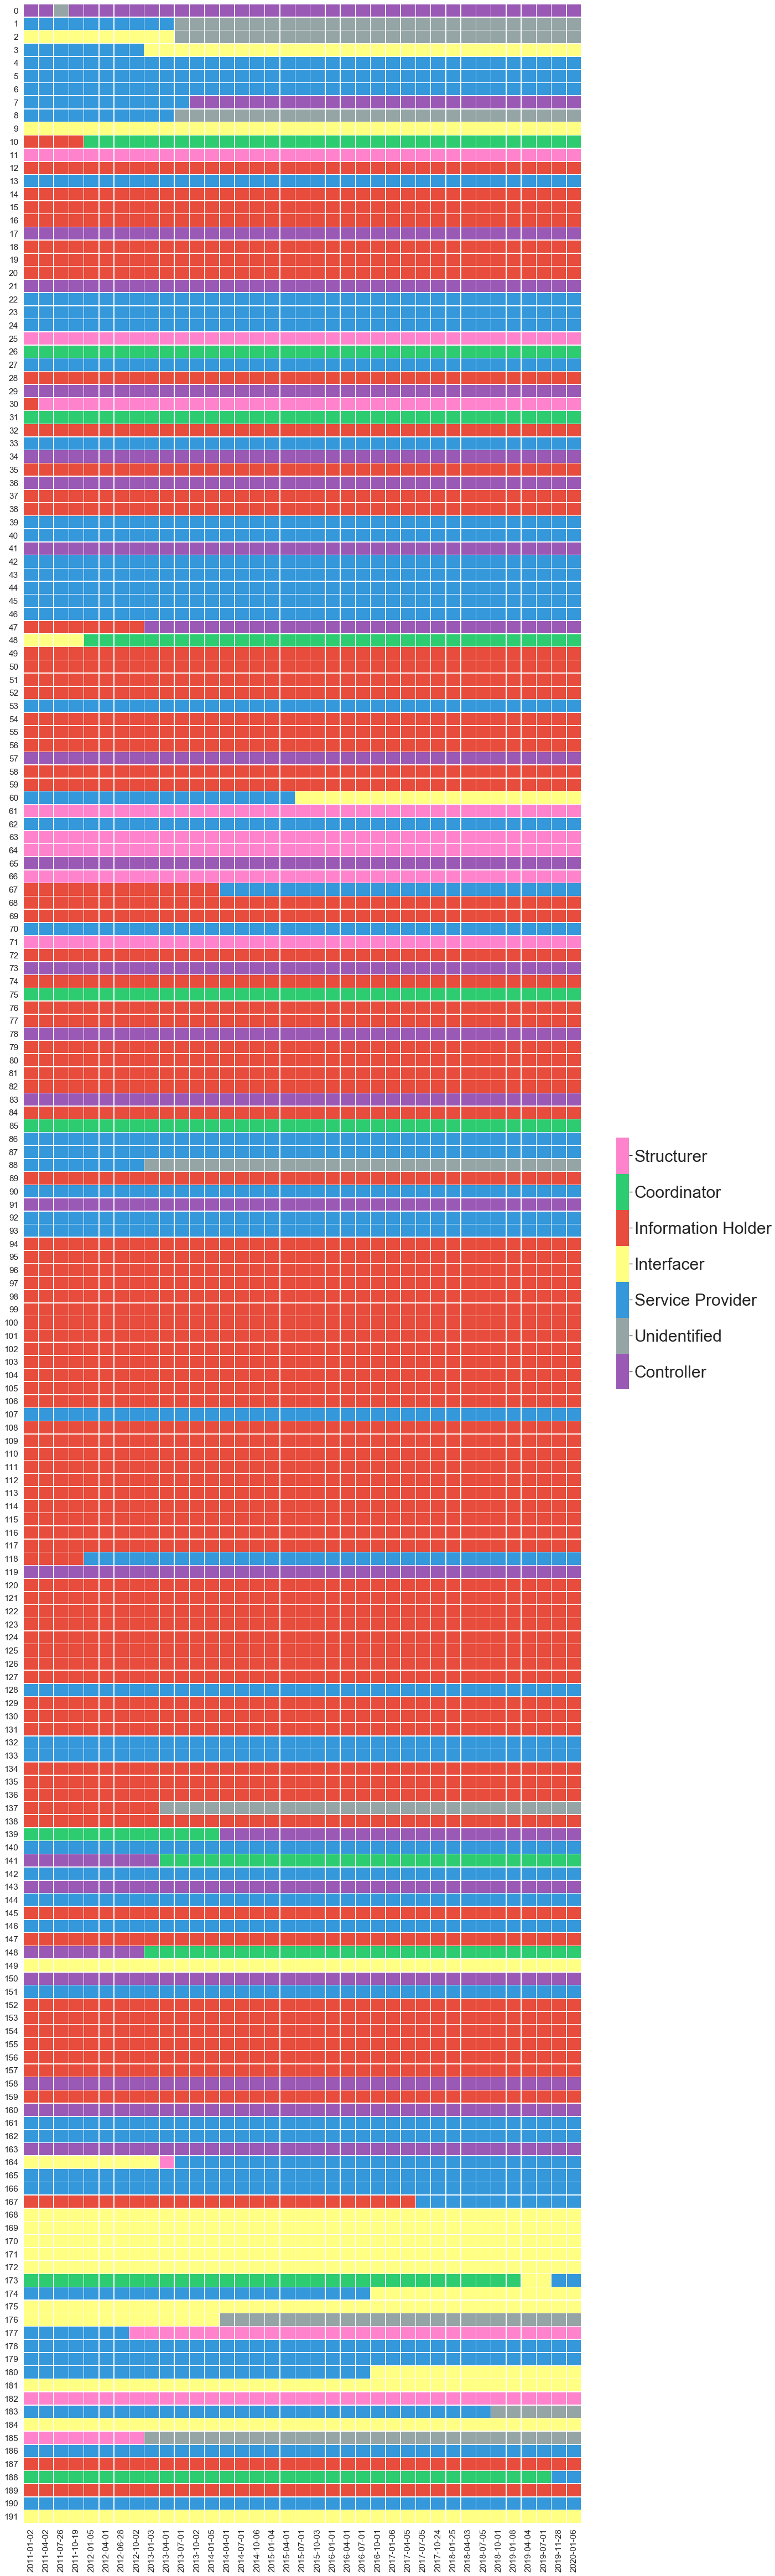

In [50]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_1.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_1.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_1.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("sweethome-1.png")

In [51]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_2.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_2.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_2.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("sweethome-2.png")

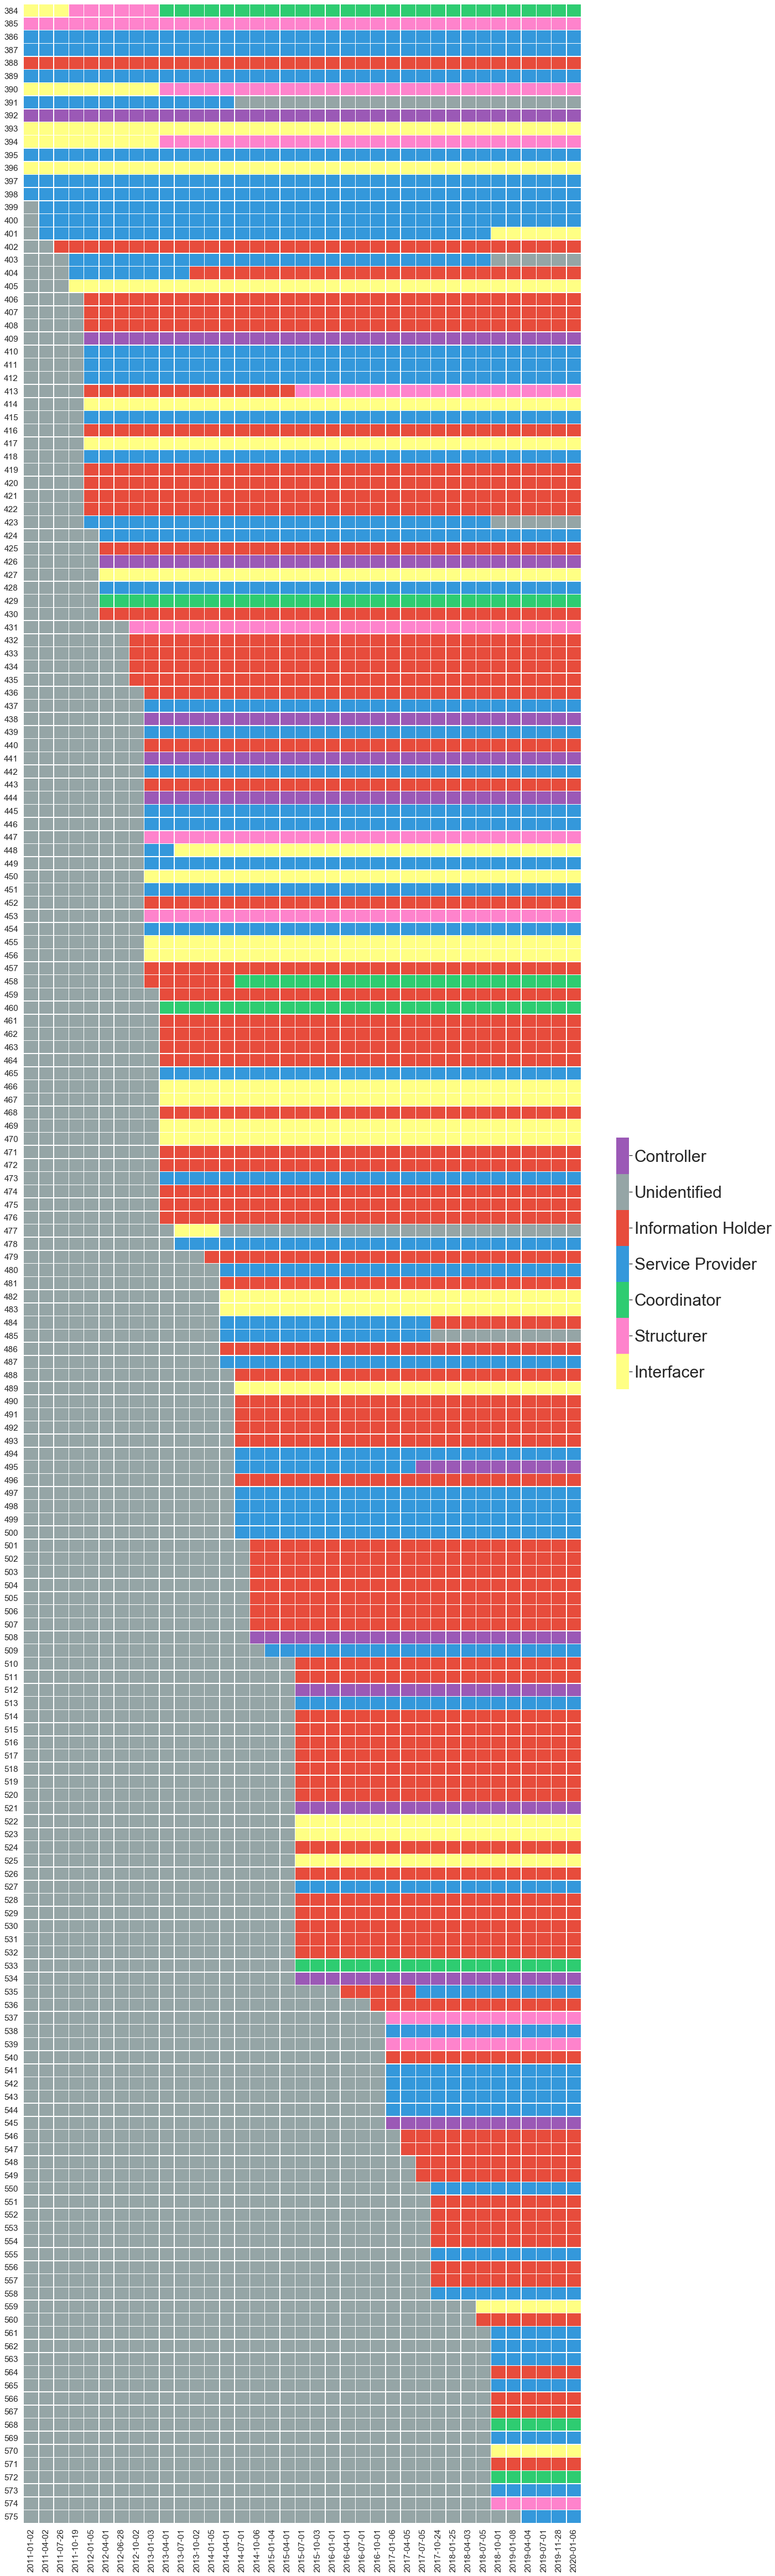

In [52]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_3.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_3.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_3.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("sweethome-3.png")

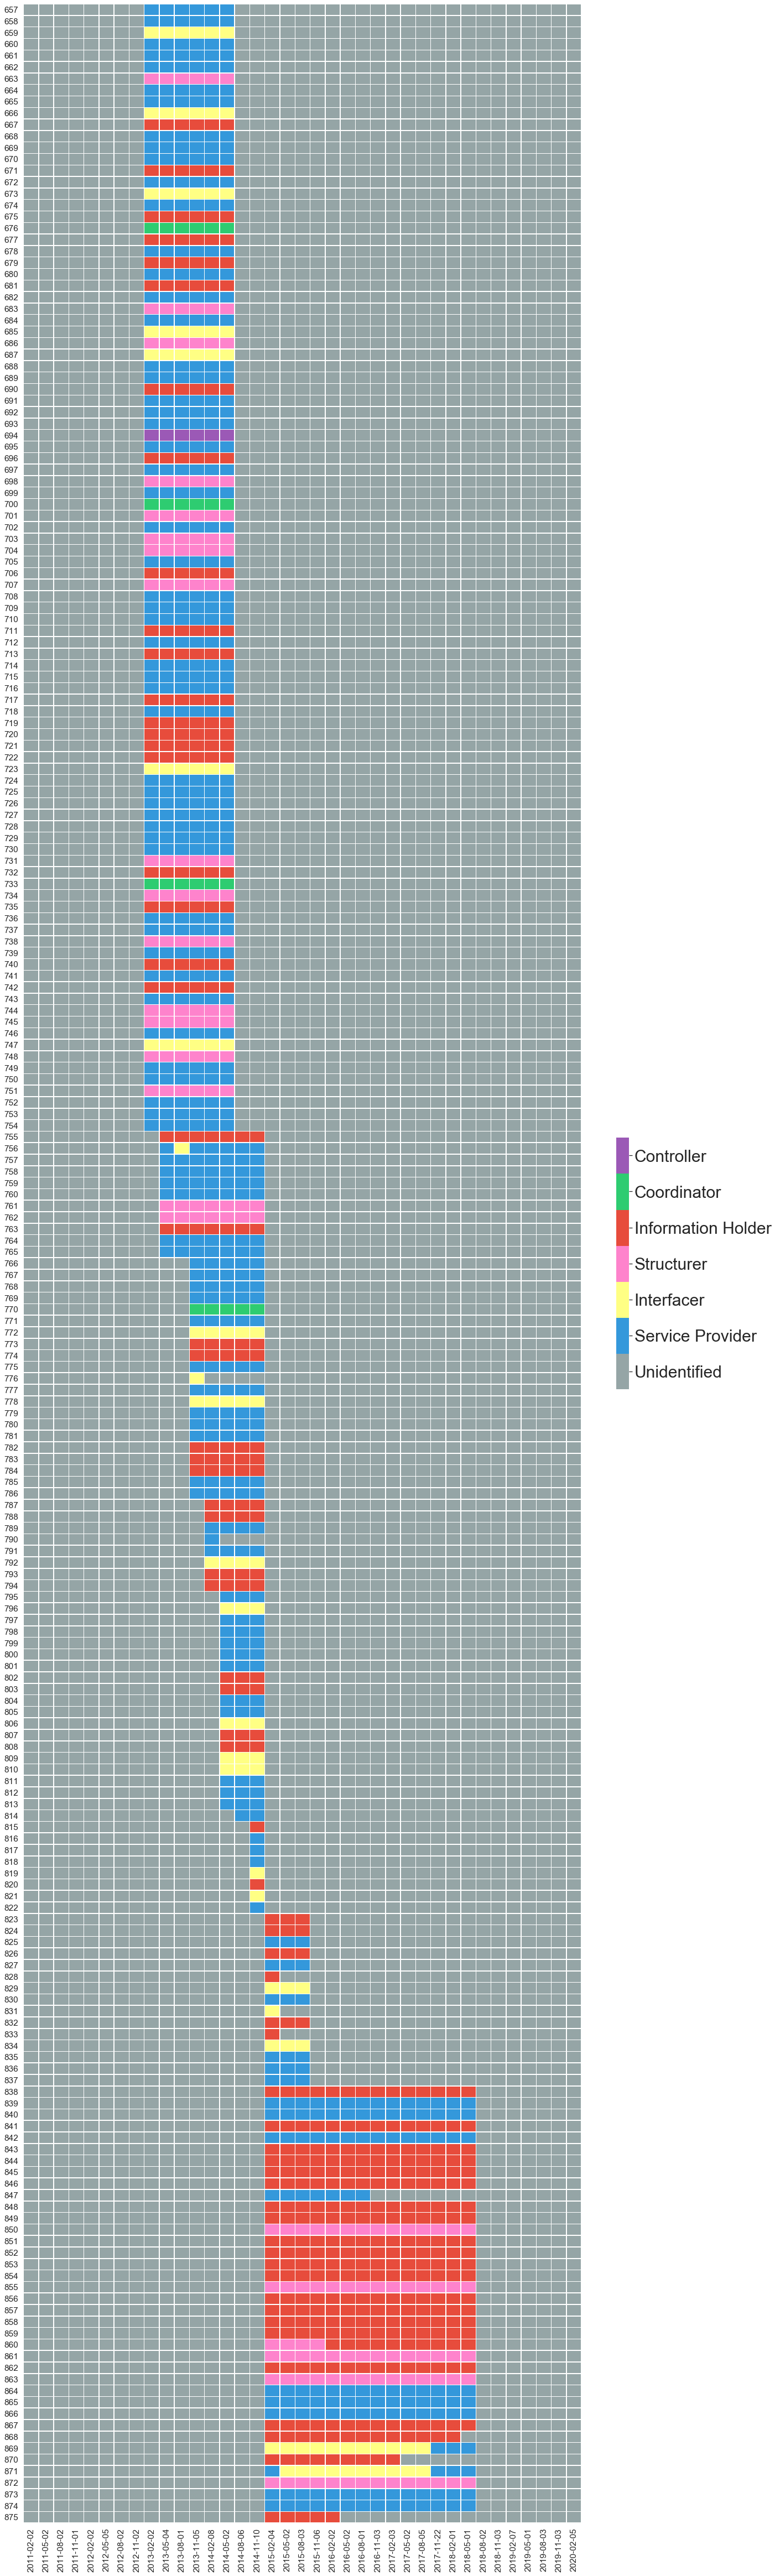

In [35]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_4.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_4.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_4.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-4.png")

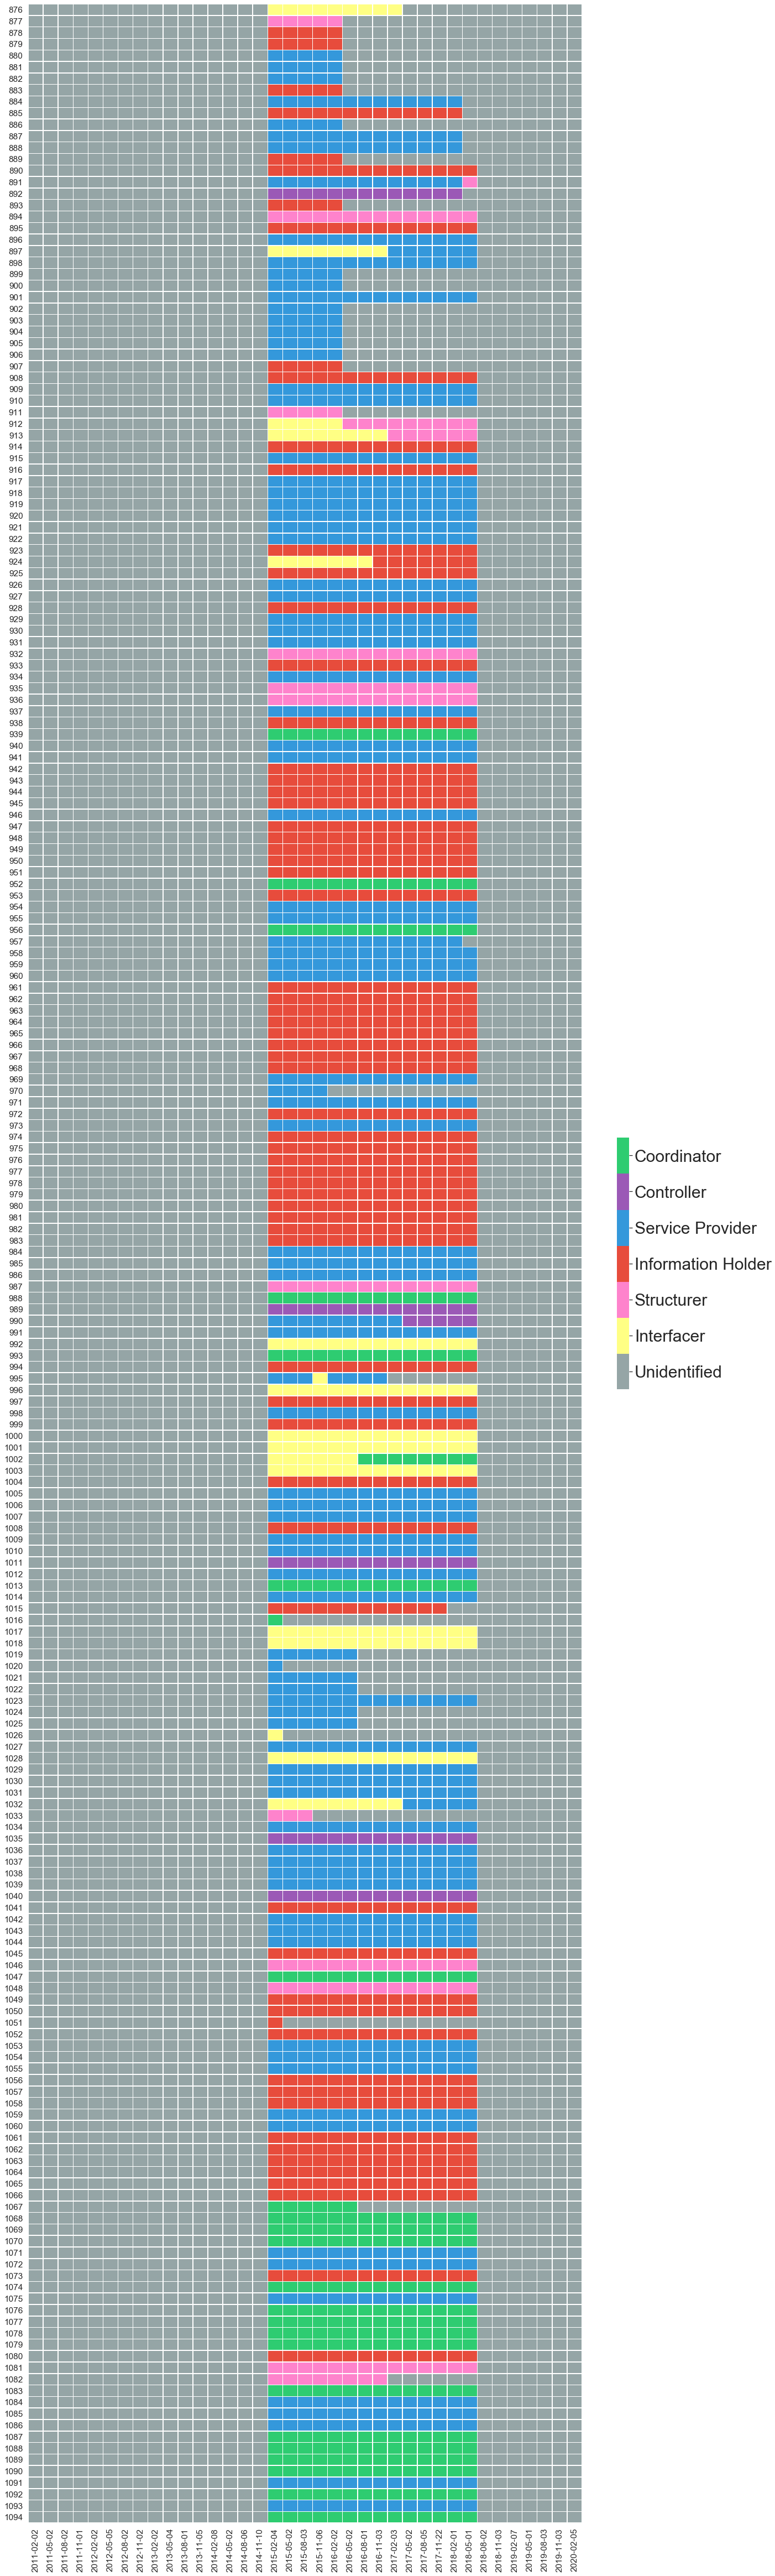

In [36]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_5.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_5.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_5.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-5.png")

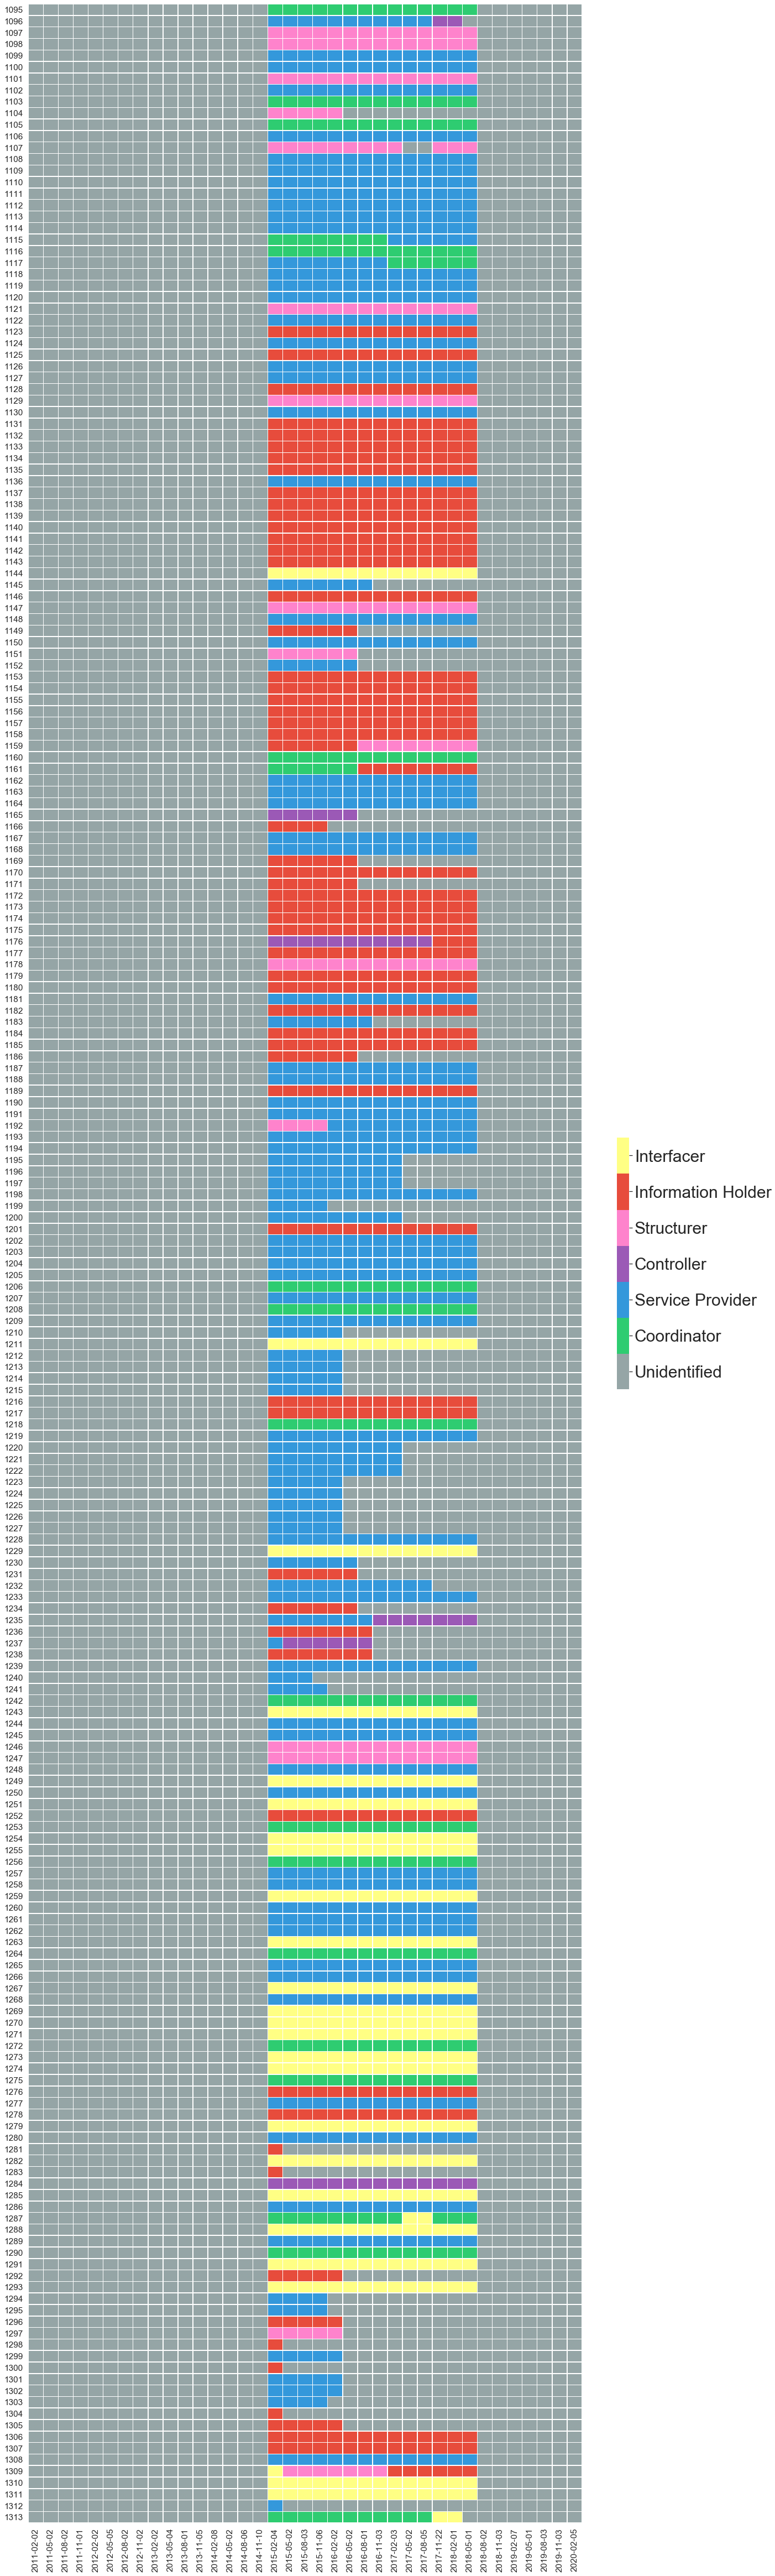

In [37]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_6.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_6.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_6.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-6.png")

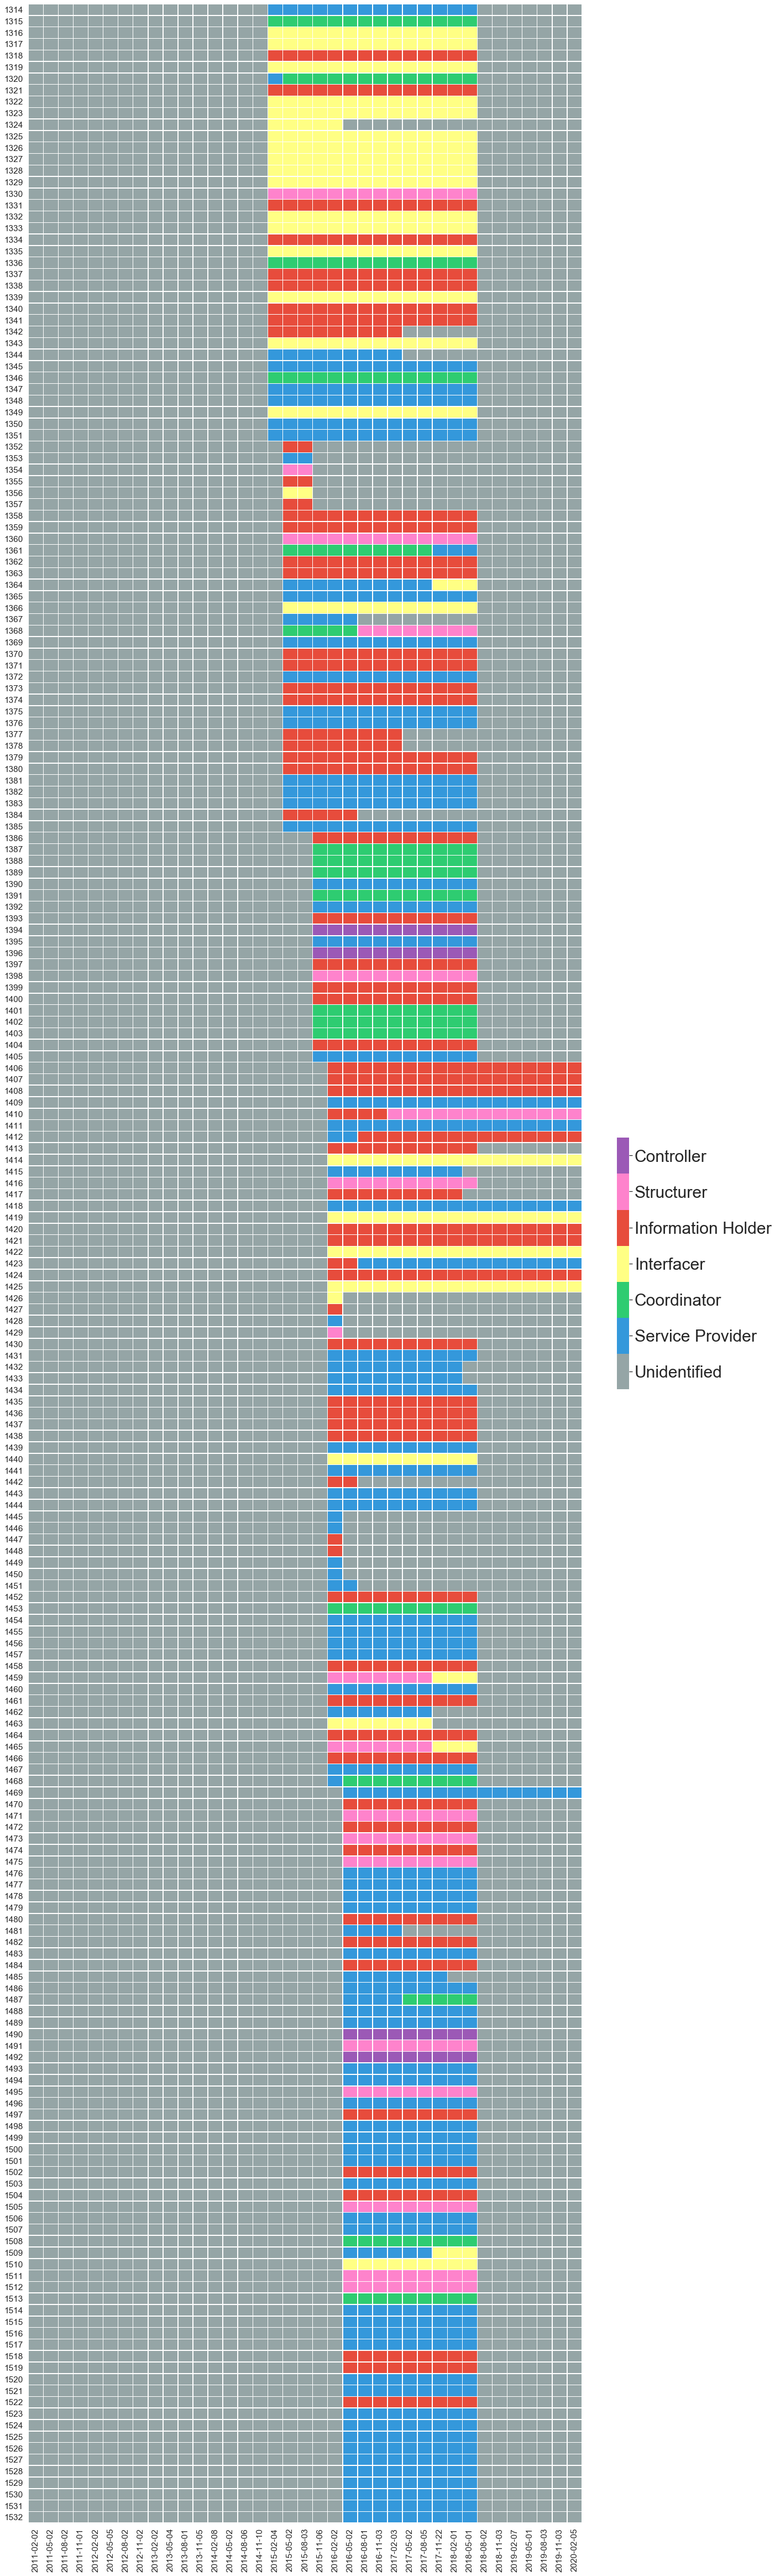

In [38]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_7.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_7.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_7.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-7.png")

In [39]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_8.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_8.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_8.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-8.png")

In [40]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_9.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_9.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_9.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-9.png")

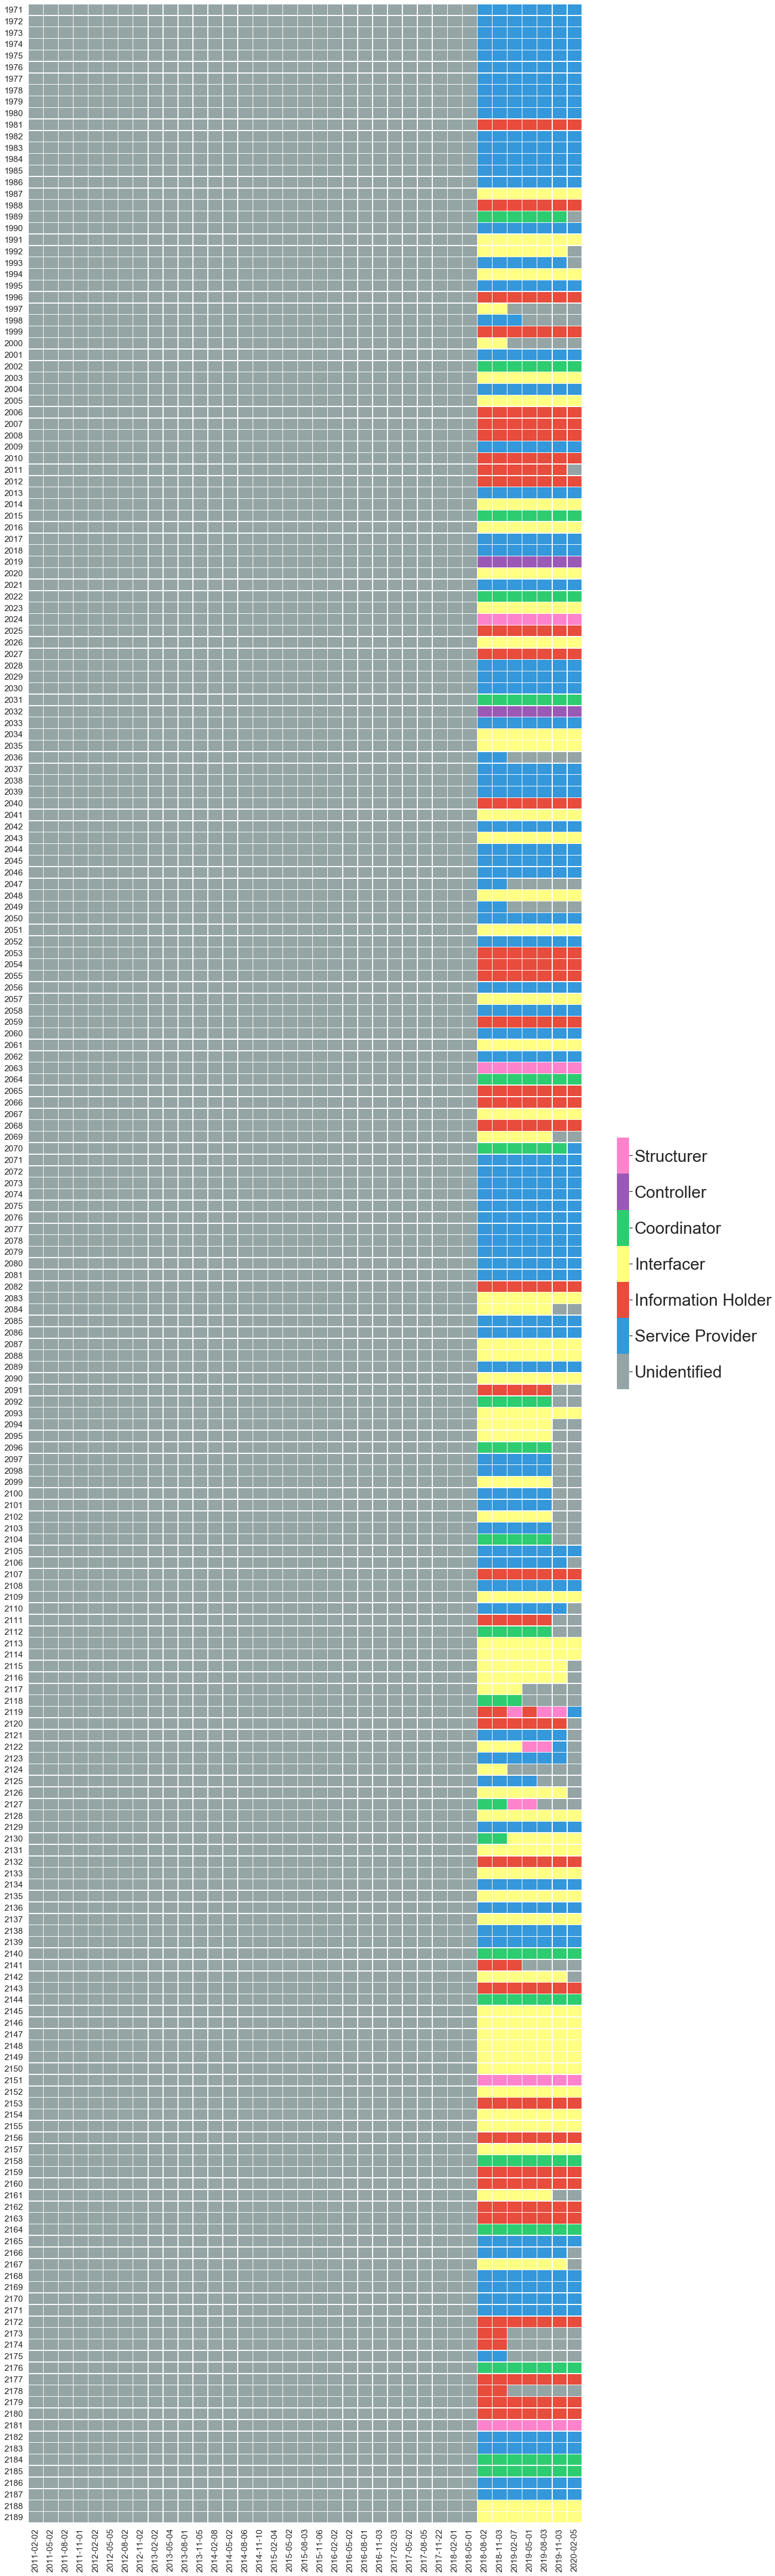

In [41]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_10.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_10.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_10.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-10.png")

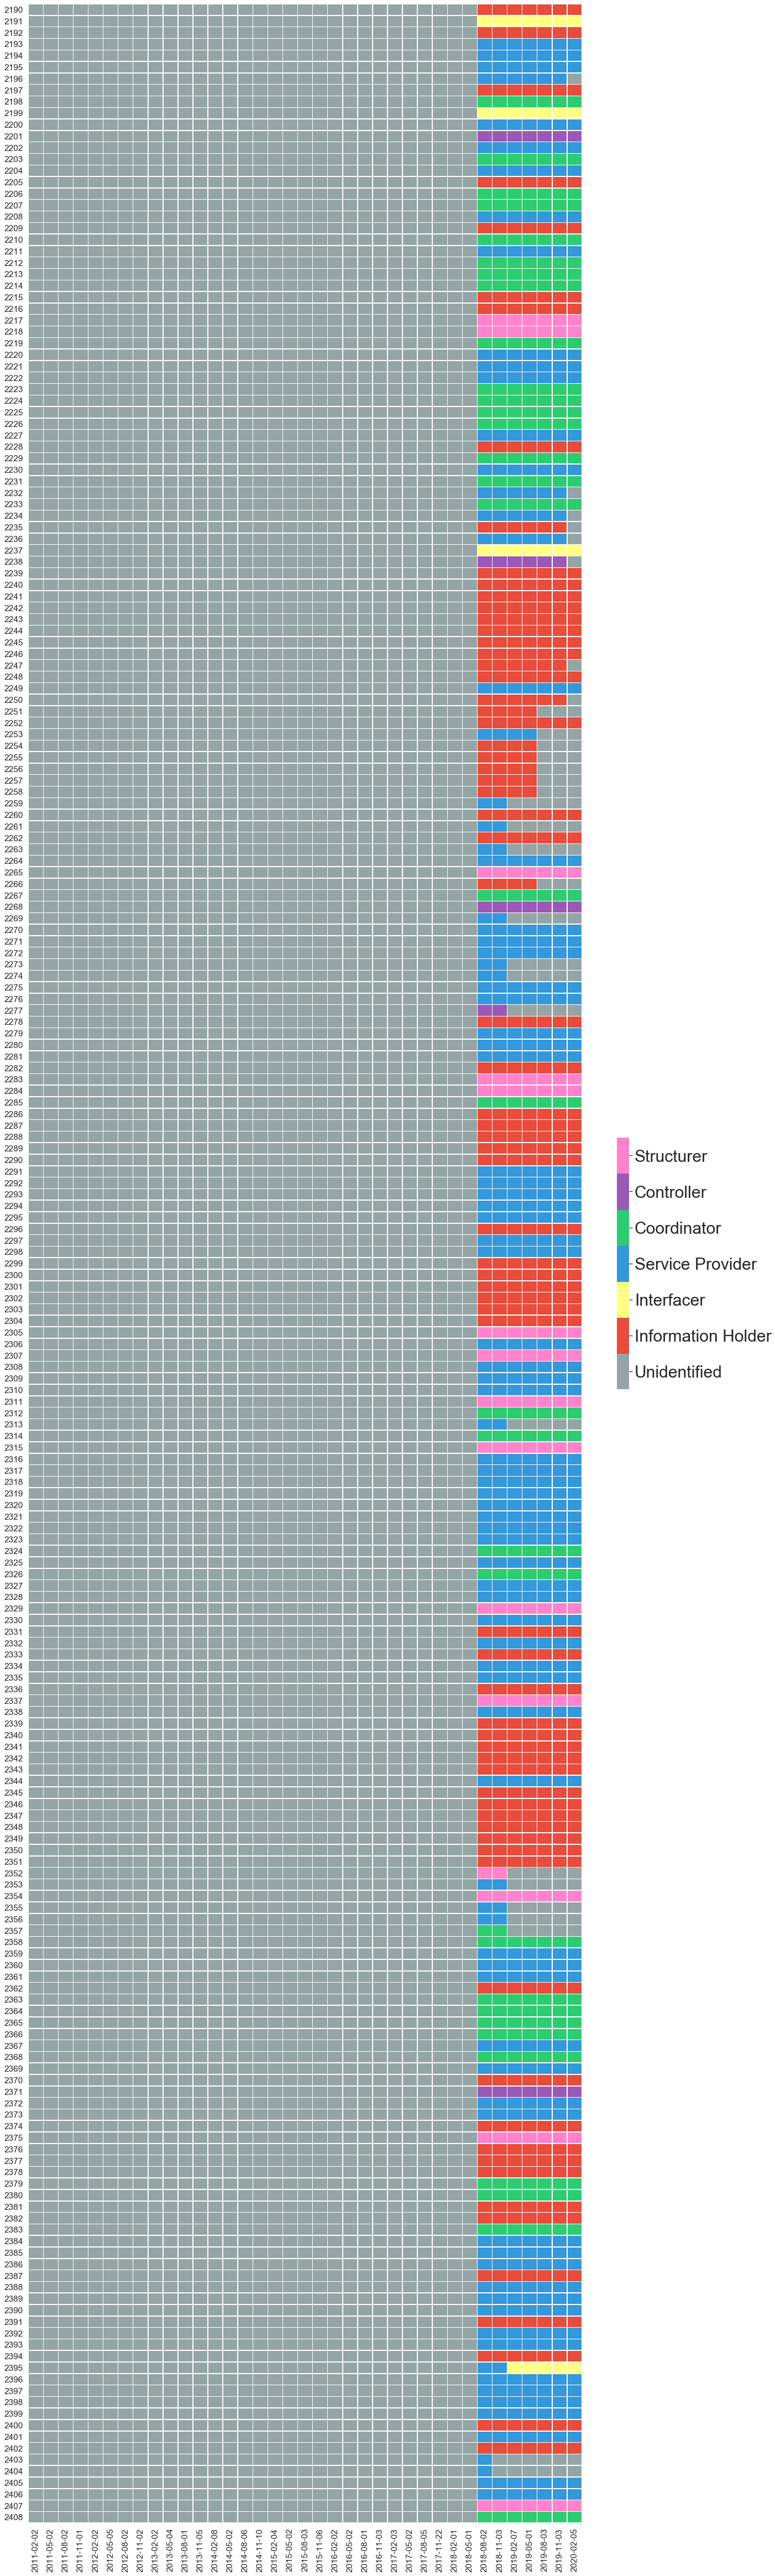

In [42]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_11.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_11.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_11.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-11.png")

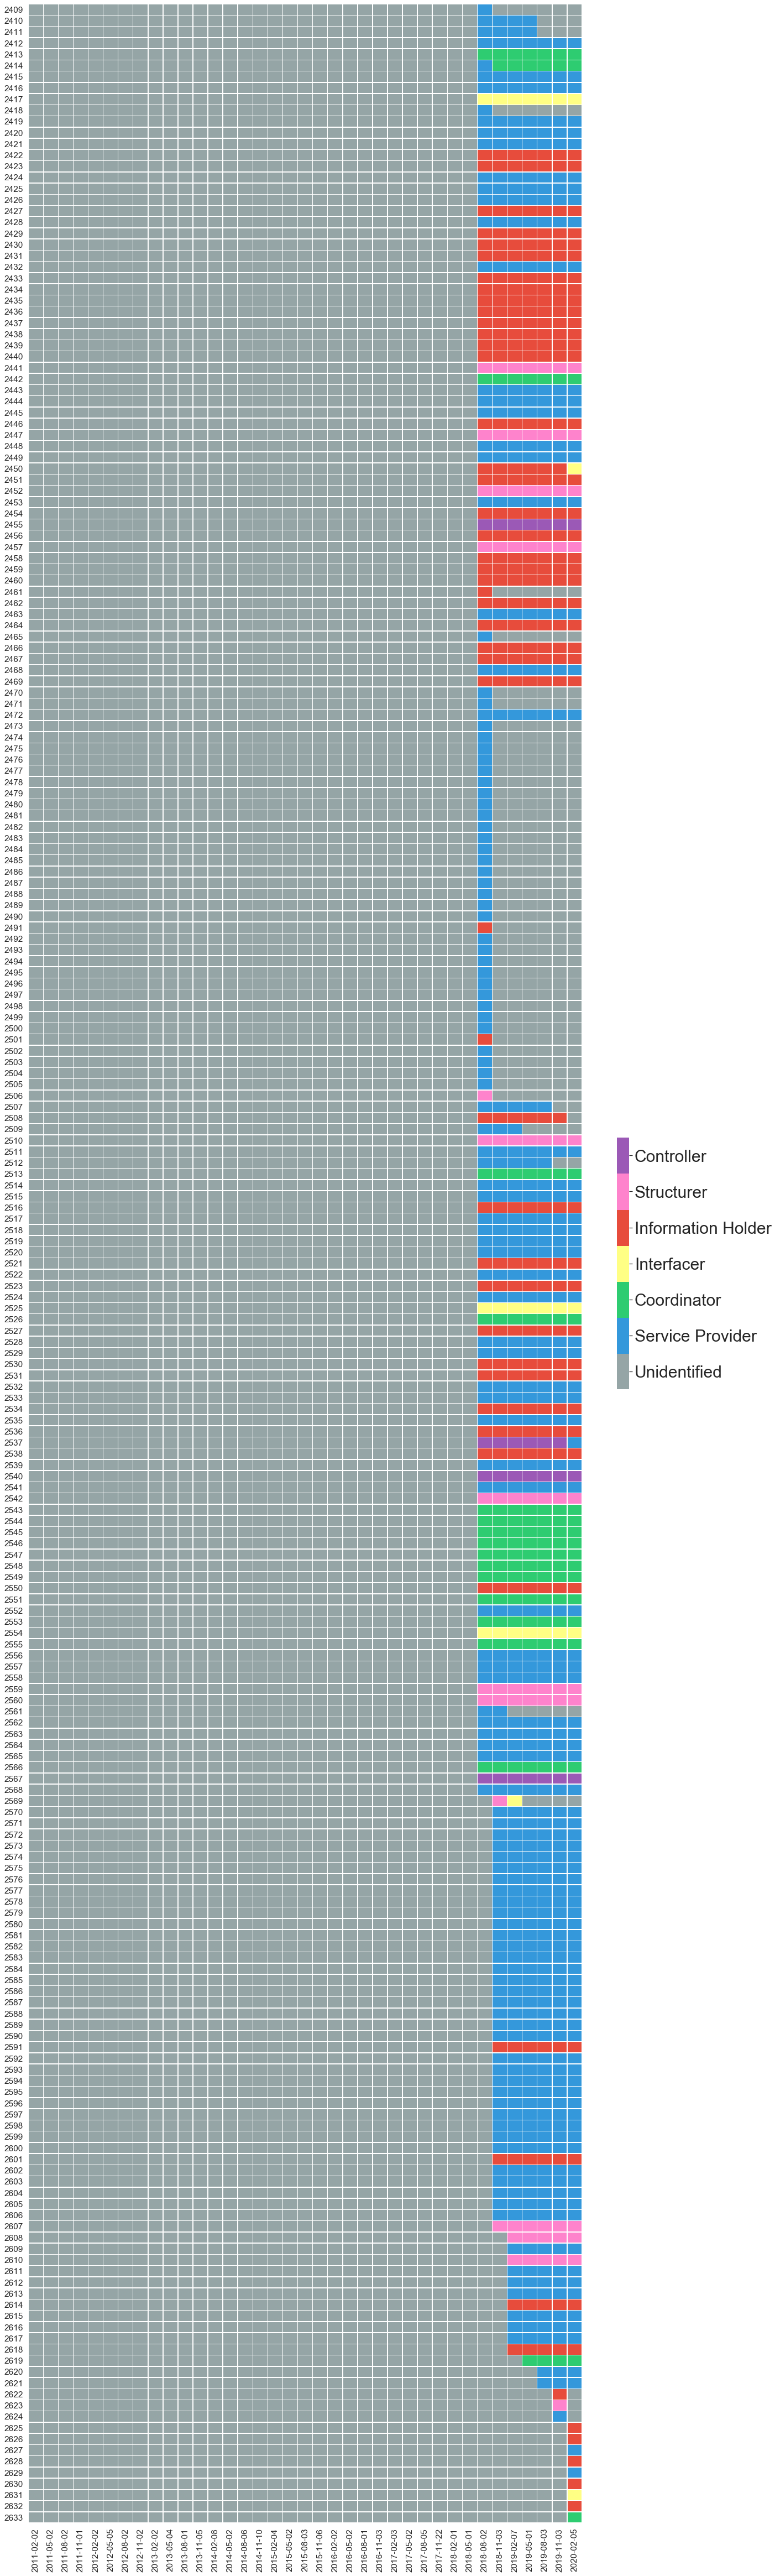

In [43]:
color_list = list(np.array([role2color[i] for i in pd.unique(data_final_12.values.flat)]))
value_to_int = {j:i for i,j in enumerate(pd.unique(data_final_12.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
sns.set(font_scale=1.4)
cmap = ListedColormap(color_list)
plt.figure(figsize=(20,65))
MAIN_AX = sns.heatmap(data_final_12.replace(value_to_int), cmap=cmap,
                 linewidths=.5, linecolor='white',
                 cbar_kws={"shrink": 0.1}) 
# modify colorbar:
colorbar = MAIN_AX.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
colorbar.ax.tick_params(labelsize=30)
#MAIN_AX.set(yticks=[])
MAIN_AX.set_ylabel('')
MAIN_AX.figure.tight_layout()
MAIN_AX.figure.savefig("k9-12.png")